1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import kaleido

import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go


2. Data Exploration


In [2]:
df = pd.read_csv("BankChurners.csv")
pd.set_option('display.max_columns', 500)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df_drop = df.drop(axis=1, columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

Feature Exploration

    - CLIENTNUM : Unique client identifier.
    - Attrition_Flag : Indicates whether the customer's account is active or has churned.
    - Customer_Age : Age of the customer.
    - Gender : Gender of the customer.
    - Dependent_count : Number of dependents of the customer.
    - Education_Level : Educational level of the customer.
    - Marital_Status : Marital status of the customer.
    - Income_Category : Income category of the customer.
    - Card_Category : Category of the credit card held by the customer.
    - Months_on_book : Number of months the customer has been a bank client.
    - Total_Relationship_Count : Total number of bank products held by the customer.
    - Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.
    - Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.
    - Credit_Limit : Credit limit on the credit card.
    - Total_Revolving_Bal : Total revolving balance on the credit card.
    - Avg_Open_To_Buy : Average open to buy credit line on the credit card.
    - Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.
    - Total_Trans_Amt : Total transaction amount in the last 12 months.
    - Total_Trans_Ct : Total transaction count in the last 12 months.
    - Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.
    - Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [5]:
df_drop.shape

(10127, 21)

In [6]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df_drop.duplicated().sum()

0

In [8]:
df_drop.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# Count the number of unique values -> in each features
df_drop.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [10]:
# Describe quantitative data
df_drop.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
# Describe categorical data
df_drop.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


3. Exploratary Data Analysis 

In [12]:
# Split into Numerical Data & Categorical Data

numerical_data = ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

categorical_data = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

    3.1 - Univariate Analysis

Categorical Data Exploration

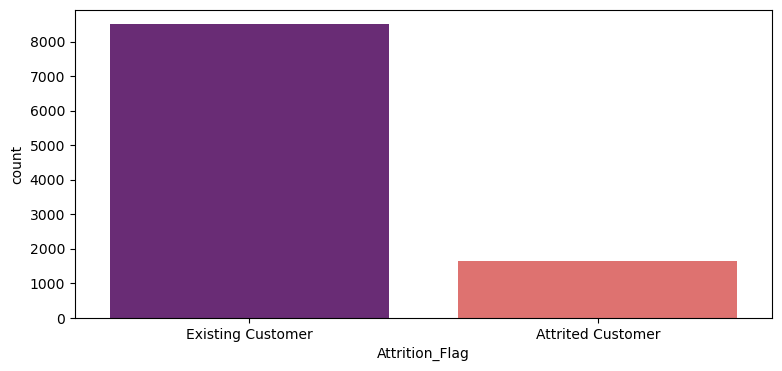

In [13]:
# Attrition_Flag Distribution

Attrition_count = df_drop['Attrition_Flag'].value_counts()

fig = plt.figure(figsize= (9,4))
sns.countplot(data = df_drop,
              x = "Attrition_Flag",
              palette="magma",
              order = df_drop["Attrition_Flag"].value_counts(ascending=False).index
              )


attrition_dist = px.pie(df_drop, names=df['Attrition_Flag'].value_counts().index, 
             title='Attrition Flag Distribution',
             color_discrete_sequence= px.colors.qualitative.Antique,
             values = df_drop['Attrition_Flag'].value_counts().values,
             width=800, height=400
            )

attrition_dist

In [14]:
# Gender Distribution

gender_dist = px.bar(x = df_drop["Gender"].value_counts().index, 
                y = df_drop["Gender"].value_counts().values,
                color_discrete_sequence= px.colors.qualitative.Antique,
                color= df_drop["Gender"].value_counts().values,
                title= "Gender Distribution",
                width= 800, height=400)

gender_dist.update_layout(showlegend=True,
                     xaxis_title="Gender", yaxis_title="Count")

gender_dist


In [15]:
# Education Level Distribtion

Education_level_dist = px.histogram(df_drop, x='Education_Level', 
                   title='Education Level Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Education_level_dist.update_xaxes(categoryorder='total ascending')

Education_level_dist

In [16]:
# Martial Status Distribution

Marital_Status_dist = px.histogram(df, x='Marital_Status', 
                   title='Marital_Status Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Marital_Status_dist

In [17]:
# Income Distribution

Income_dist = px.histogram(df, x='Income_Category', 
                   title='Income_Category Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Income_dist.update_xaxes(categoryorder='total ascending')

Income_dist

In [19]:
# Card Category Distribution

Card_Category_dist = px.histogram(df_drop, x='Card_Category', 
                   title='Card Category Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   text_auto=True,
                   width= 800, height=400,
                   template = "seaborn")

Card_Category_dist.update_xaxes(categoryorder='total ascending')

Card_Category_dist.show()